# QC Entity Inventory Explorer

This notebook allows exploration of QC entity inventory results generated
by `qc_entity_inventory.py`.  

We can inspect:
- The top entities per class
- Rare entities with low occurrences
- Distribution statistics

## Load libraries and setup

In [3]:
import sys
from pathlib import Path

import pandas as pd

project_root = Path("..").resolve()
sys.path.insert(0, str(project_root))
from src.utils import plot_top_entities

In [4]:
%load_ext watermark
%watermark

Last updated: 2025-12-26T23:13:27.654809+01:00

Python implementation: CPython
Python version       : 3.14.0
IPython version      : 8.13.2

Compiler    : Clang 20.1.4 
OS          : Linux
Release     : 6.8.0-51-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [5]:
# Folder containing the QC entity inventory files
out_folder = Path("../results/qc_annotations")

# Dictionary to store data per class
entity_data = {}

## Load data

In [6]:
for file_path in out_folder.glob("*.txt"):
    with file_path.open(encoding="utf-8") as f:
        lines = f.readlines()

    # Skip header lines (start with #)
    data_lines = [line.strip() for line in lines if not line.startswith("#")]

    # Build DataFrame
    df = pd.DataFrame(
        [line.split("\t") for line in data_lines],
        columns=["entity", "count"]
    )
    df.loc[:, "count"] = df["count"].astype(int)
    # Store per class
    entity_data[file_path.stem] = df

print(f"Loaded {len(entity_data)} classes: {list(entity_data.keys())}")


Loaded 6 classes: ['SOFTVERS', 'TEMP', 'STIME', 'FFM', 'MOL', 'SOFTNAME']


## 

## Molecules

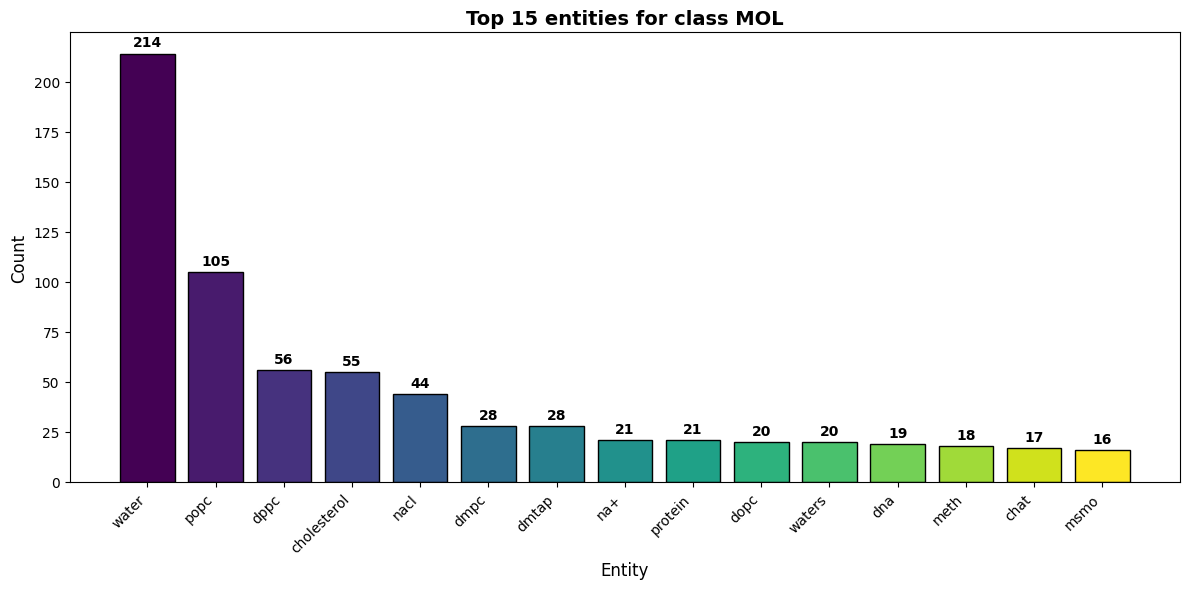

In [14]:
class_name = "MOL"
df = entity_data[class_name]
plot_top_entities(df, top_k=15, class_name=class_name)


In [15]:
total_entities = len(df)
rare_df = df[df["count"] == 1]
num_rare = len(rare_df)

print(f"Rare molecules (count = 1): {num_rare} / {total_entities} total entities")
rare_df

Rare molecules (count = 1): 599 / 1175 total entities


,entity,count
576,(s)-norcoclaurine,1
577,"1,1-bis [4-bis (4-methylphenyl) aminophenyl] c...",1
578,"1,2-diauroyl-sn-glycero-3-phospocholine",1
579,"1,2-dioleoyl-sn-glycero-3-phosphocholine",1
580,"1,2-dipalmitoyl-sn-glycero-3-phospcholine",1
...,...,...
1170,zn,1
1171,zwitterionic,1
1172,β-lactam,1
1173,β-lactamase,1


## Force Field Model

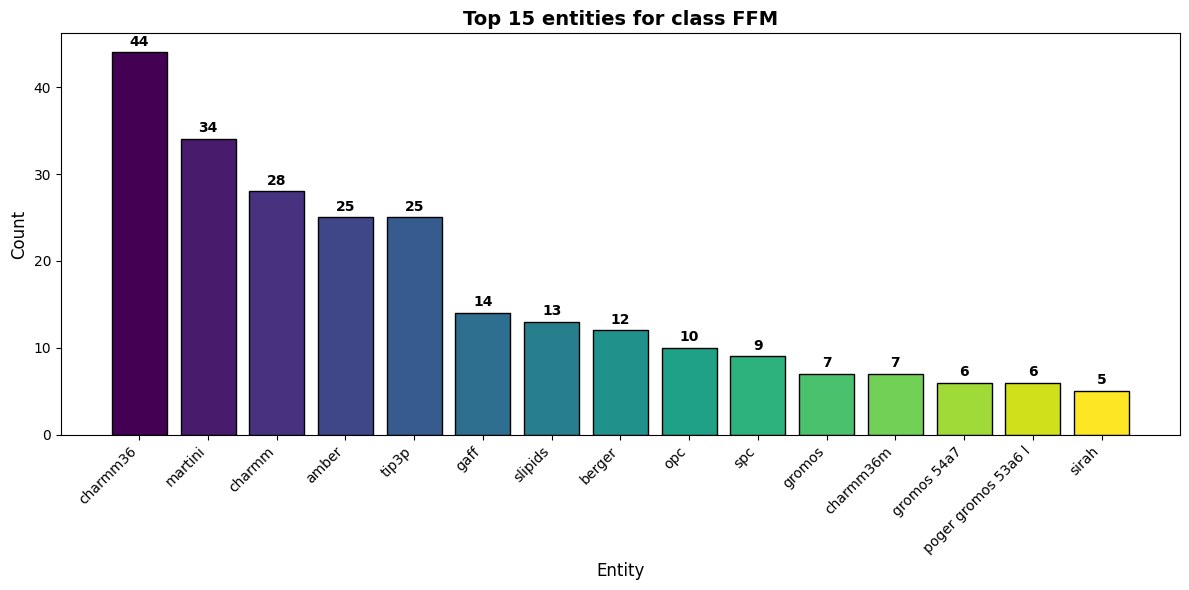

In [16]:
class_name = "FFM"
df = entity_data[class_name]
plot_top_entities(df, top_k=15, class_name=class_name)

In [17]:
total_entities = len(df)
rare_df = df[df["count"] == 1]
num_rare = len(rare_df)

print(f"Rare force field models (count = 1): {num_rare} / {total_entities} total entities")
rare_df

Rare force field models (count = 1): 47 / 106 total entities


,entity,count
59,'berger,1
60,amber ff99sb,1
61,amber ff99sb-ildn,1
62,amber lipid14,1
63,amber10: extended huckel theory (eht),1
64,amber14,1
65,amber14sb,1
66,amber99sb,1
67,amoeba,1
68,atomic multipole optimized energetics for biom...,1


## Software name

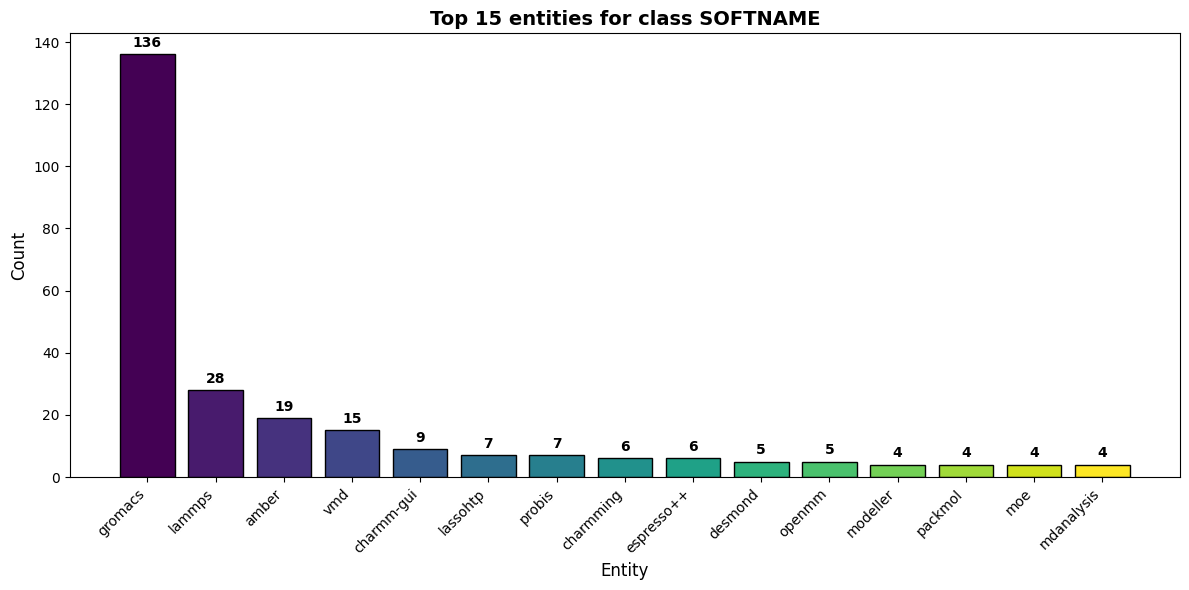

In [22]:
class_name = "SOFTNAME"
df = entity_data[class_name]

plot_top_entities(df, top_k=15, class_name=class_name)

In [23]:
total_entities = len(df)
rare_df = df[df["count"] == 1]
num_rare = len(rare_df)

print(f"Rare software names (count = 1): {num_rare} / {total_entities} total entities")
rare_df

Rare software names (count = 1): 42 / 79 total entities


,entity,count
37,abaqus,1
38,acemd,1
39,aimd,1
40,alphafold,1
41,ase,1
42,asegui,1
43,autodock,1
44,autodock4,1
45,chimerax,1
46,colvar,1


## Software version

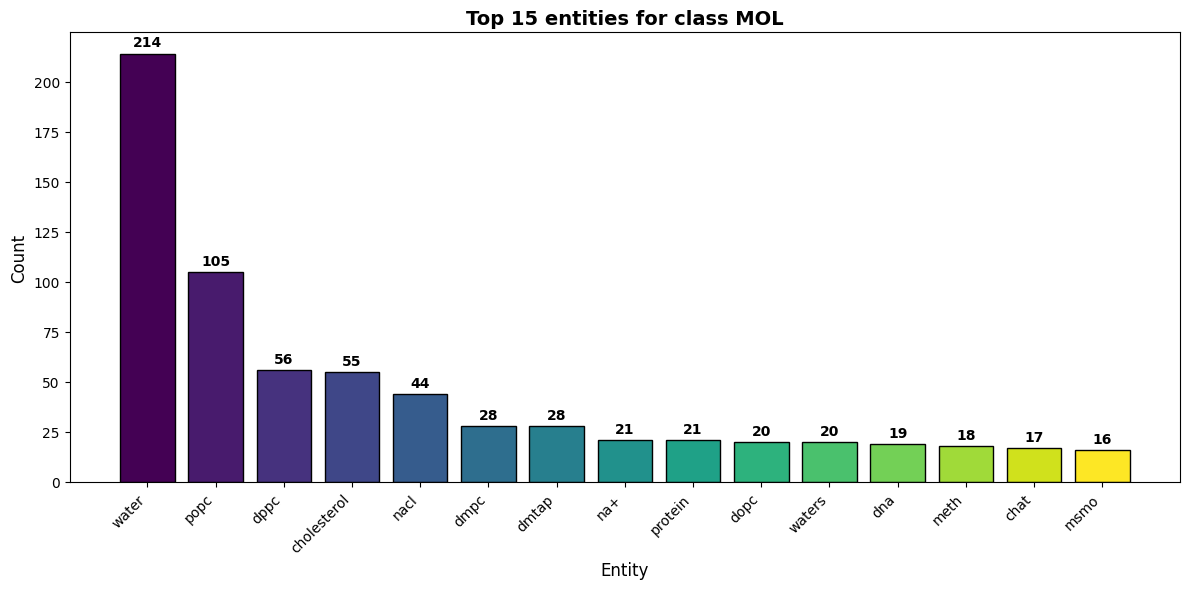

In [ ]:
class_name = "MOL"
df = entity_data[class_name]

plot_top_entities(df, top_k=15, class_name=class_name)

In [25]:
total_entities = len(df)
rare_df = df[df["count"] == 1]
num_rare = len(rare_df)

print(f"Rare software versions (count = 1): {num_rare} / {total_entities} total entities")
rare_df

Rare software versions (count = 1): 599 / 1175 total entities


,entity,count
576,(s)-norcoclaurine,1
577,"1,1-bis [4-bis (4-methylphenyl) aminophenyl] c...",1
578,"1,2-diauroyl-sn-glycero-3-phospocholine",1
579,"1,2-dioleoyl-sn-glycero-3-phosphocholine",1
580,"1,2-dipalmitoyl-sn-glycero-3-phospcholine",1
...,...,...
1170,zn,1
1171,zwitterionic,1
1172,β-lactam,1
1173,β-lactamase,1


## Simulation time

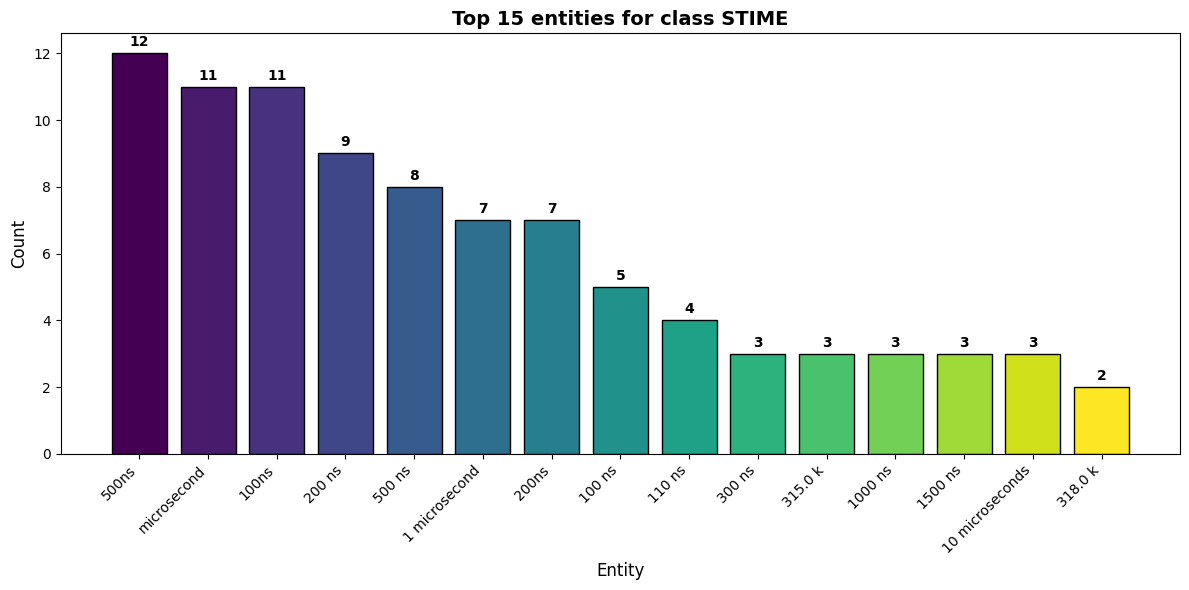

In [26]:
class_name = "STIME"
df = entity_data[class_name]

plot_top_entities(df, top_k=15, class_name=class_name)

In [27]:
total_entities = len(df)
rare_df = df[df["count"] == 1]
num_rare = len(rare_df)

print(f"Rare simulation times (count = 1): {num_rare} / {total_entities} total entities")
rare_df

Rare simulation times (count = 1): 71 / 98 total entities


,entity,count
27,0.5 μs,1
28,0.6,1
29,0.633 us,1
30,0.79 ns,1
31,1 ns,1
...,...,...
93,87 microsecond,1
94,micro- to millisecond,1
95,multi-microsecond,1
96,nanosecond,1


## Temperature

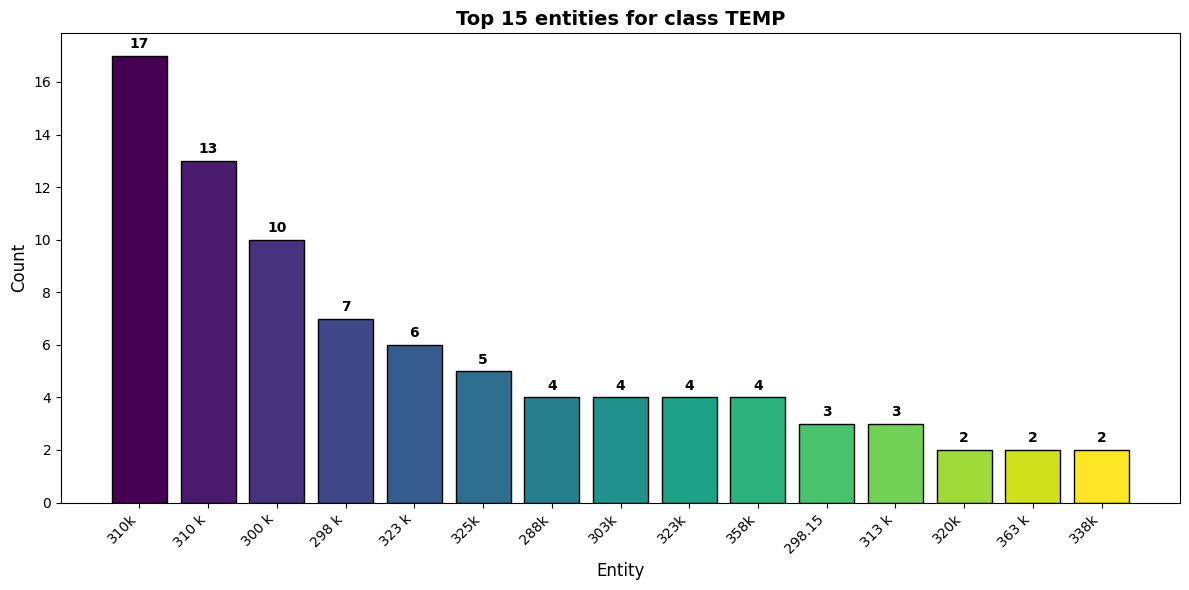

In [28]:
class_name = "TEMP"
df = entity_data[class_name]

plot_top_entities(df, top_k=15, class_name=class_name)

In [29]:
total_entities = len(df)
rare_df = df[df["count"] == 1]
num_rare = len(rare_df)

print(f"Rare software versions (count = 1): {num_rare} / {total_entities} total entities")
rare_df

Rare software versions (count = 1): 39 / 57 total entities


,entity,count
18,130 k,1
19,200,1
20,210 k,1
21,225 k,1
22,242,1
23,25,1
24,2500,1
25,273.15 k,1
26,285,1
27,293 k,1
